In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
df = pd.util.testing.makeTimeDataFrame(50)

/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/pandas/util/__init__.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


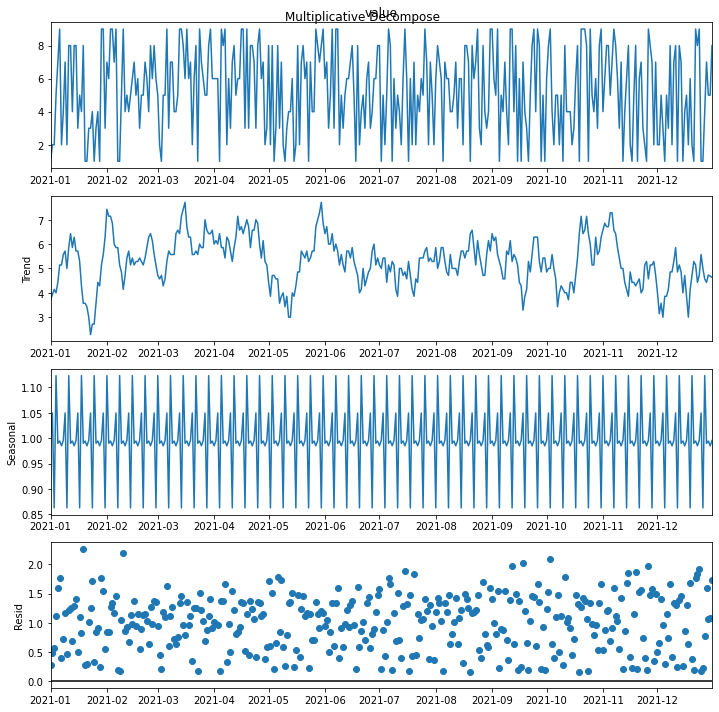

In [4]:
df = pd.DataFrame(np.random.randint(1, 10, size=(365, 1)), columns=['value'],
        index=pd.date_range('2021-01-01', periods=365, freq='D'))
result_mul = seasonal_decompose(df['value'],
             model='multiplicative',
             extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (10, 10)})
result_mul.plot().suptitle('Multiplicative Decompose')
plt.show()

In [6]:
from scipy.fftpack import fft, fftfreq

fft_series = fft(df["value"].values)
power = np.abs(fft_series)
sample_freq = fftfreq(fft_series.size)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powers = power[pos_mask]

top_k_seasons = 3
# top K=3 index
top_k_idxs = np.argpartition(powers, -top_k_seasons)[-top_k_seasons:]
top_k_power = powers[top_k_idxs]
fft_periods = (1 / freqs[top_k_idxs]).astype(int)

print(f"top_k_power: {top_k_power}")
print(f"fft_periods: {fft_periods}")

top_k_power: [102.31887311 113.9998144  122.47278152]
fft_periods: [5 2 3]


In [9]:
from datetime import timedelta
from statsmodels.tsa.stattools import acf

# Expected time period
for lag in fft_periods:
    # lag = fft_periods[np.abs(fft_periods - time_lag).argmin()]
    acf_score = acf(df["value"].values, nlags=lag)[-1]
    print(f"lag: {lag} fft acf: {acf_score}")


expected_lags = np.array([timedelta(hours=12)/timedelta(minutes=5), timedelta(days=1)/timedelta(minutes=5), timedelta(days=7)/timedelta(minutes=5)]).astype(int)
for lag in expected_lags:
    acf_score = acf(df["value"].values, nlags=lag, fft=False)[-1]
    print(f"lag: {lag} expected acf: {acf_score}")

lag: 5 fft acf: 0.0824111036246034
lag: 2 fft acf: -0.02019439967316263
lag: 3 fft acf: 0.026891070247978814
lag: 144 expected acf: 0.021357357221961137
lag: 288 expected acf: -0.02135108559105391
lag: 2016 expected acf: -0.0047620659329616075


/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

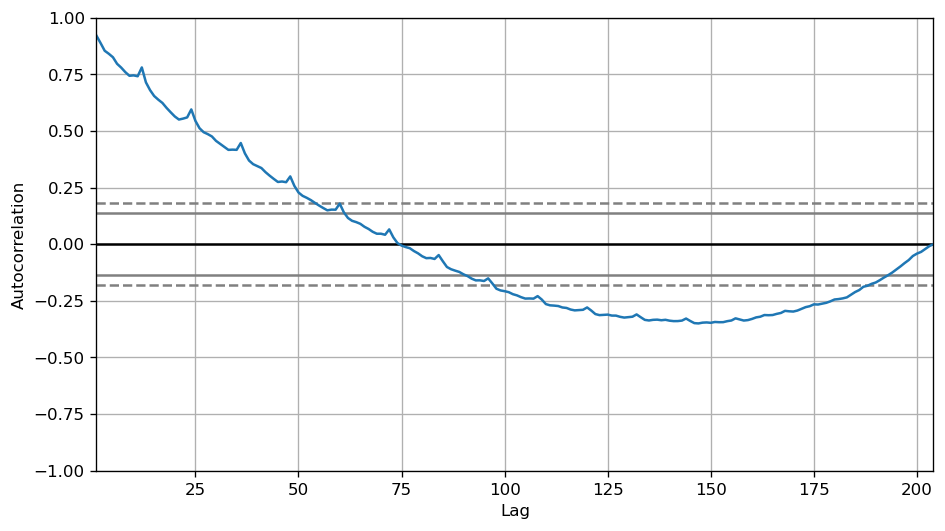

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('~/Workspace/a10.csv')
 
 
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())


In [32]:
df = pd.read_csv("../data/kpi.csv")
df['ts']=pd.to_datetime(df['timestamp'], unit='s')
df.index = df['ts']
df = df[['ts', 'value', 'label']]
df.head()

,ts,value,label
ts,,,
2017-04-01 10:08:00,2017-04-01 10:08:00,7934.0,0
2017-04-01 10:09:00,2017-04-01 10:09:00,7782.0,0
2017-04-01 10:10:00,2017-04-01 10:10:00,7349.0,0
2017-04-01 10:11:00,2017-04-01 10:11:00,7426.0,0
2017-04-01 10:12:00,2017-04-01 10:12:00,7447.0,0


In [33]:
from scipy.fftpack import fft, fftfreq

fft_series = fft(df["value"].values)
power = np.abs(fft_series)
sample_freq = fftfreq(fft_series.size)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powers = power[pos_mask]

top_k_seasons = 3
# top K=3 index
top_k_idxs = np.argpartition(powers, -top_k_seasons)[-top_k_seasons:]
top_k_power = powers[top_k_idxs]
fft_periods = (1 / freqs[top_k_idxs]).astype(int)

print(f"top_k_power: {top_k_power}")
print(f"fft_periods: {fft_periods}")

top_k_power: [6.81746407e+07 7.86914475e+07 1.11540109e+08]
fft_periods: [1387 1400 1413]


In [34]:
from statsmodels.tsa.stattools import acf

# Expected time period
for lag in fft_periods:
    # lag = fft_periods[np.abs(fft_periods - time_lag).argmin()]
    acf_score = acf(df["value"].values, nlags=lag)[-1]
    print(f"lag: {lag} fft acf: {acf_score}")

lag: 1387 fft acf: 0.8310697383965815
lag: 1400 fft acf: 0.8405312771413866
lag: 1413 fft acf: 0.8358761655793284


In [35]:
from datetime import timedelta
from statsmodels.tsa.stattools import acf

expected_lags = np.array([timedelta(hours=1)/timedelta(minutes=1), timedelta(days=1)/timedelta(minutes=1), timedelta(days=7)/timedelta(minutes=1)]).astype(int)

for lag in expected_lags:
    acf_score = acf(df["value"].values, nlags=lag, fft=False)[-1]
    print(f"lag: {lag} expected acf: {acf_score}")



lag: 60 expected acf: 0.9207865749904645
lag: 1440 expected acf: 0.8172000577993018
lag: 10080 expected acf: 0.1846313262520331


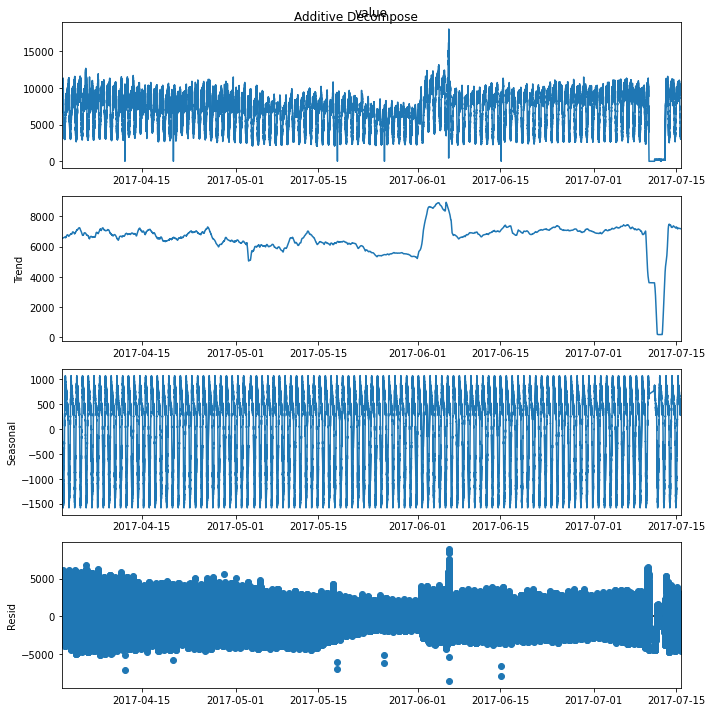

In [9]:
result_add = seasonal_decompose(df["value"],model='additive', extrapolate_trend='freq', period=1400)
plt.rcParams.update({'figure.figsize': (10, 10)})
result_add.plot().suptitle('Additive Decompose')
plt.show()

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

alpha=0.5
df['1exp'] = SimpleExpSmoothing(df["value"]).fit(smoothing_level=alpha).fittedvalues

/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [30]:
df["2exp_add"] = ExponentialSmoothing(df["value"], trend="add", seasonal=None).fit().fittedvalues
df["3exp_add"] = ExponentialSmoothing(df["value"], trend="add", seasonal="add", seasonal_periods=1400).fit().fittedvalues
# df["2exp_mul"] = ExponentialSmoothing(df["value"], trend="mul", seasonal=None).fit().fittedvalues

/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retv

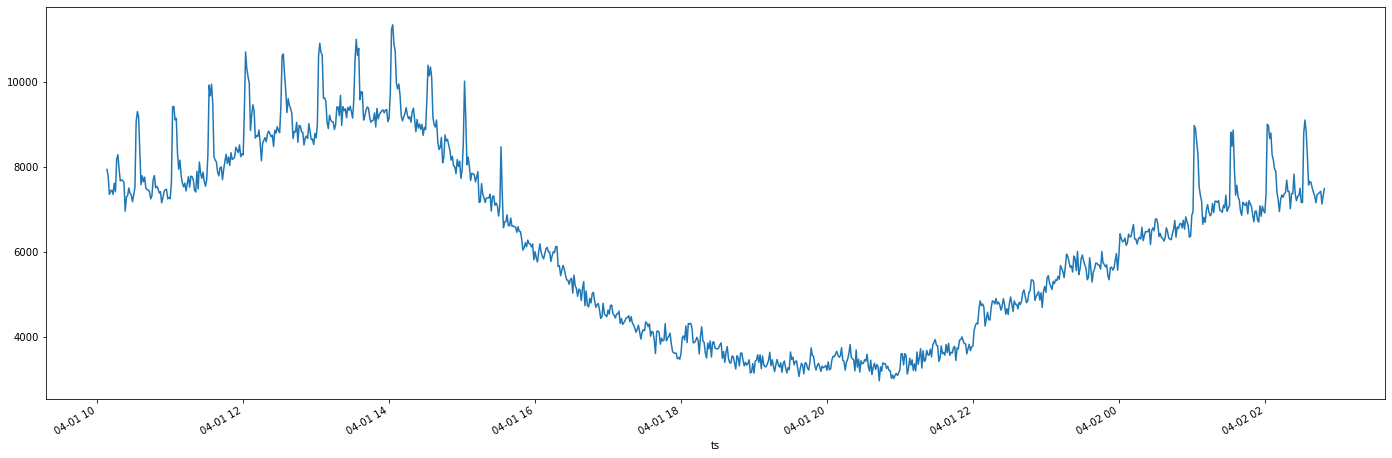

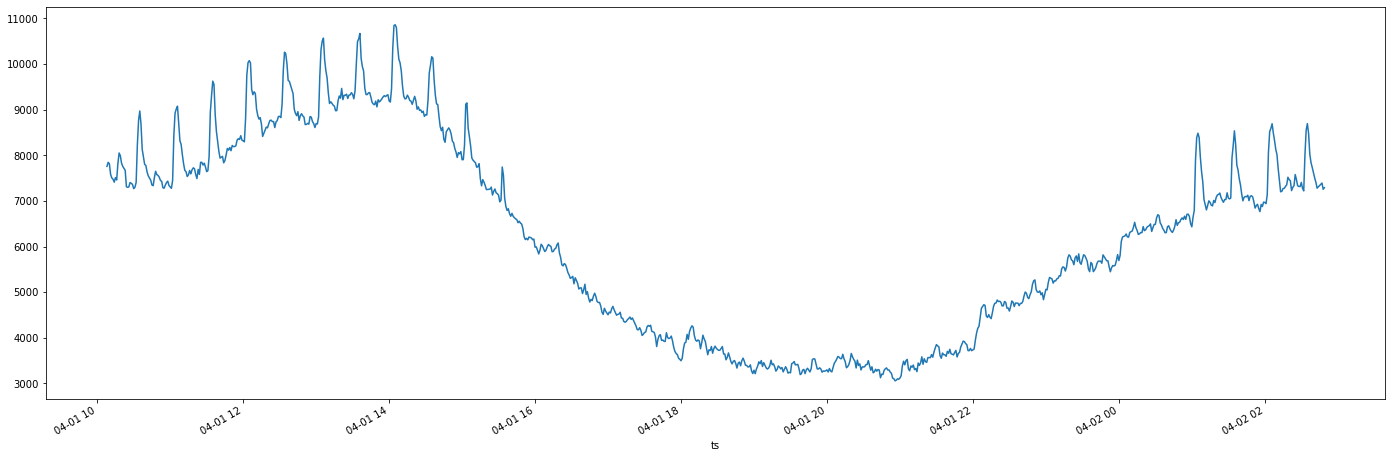

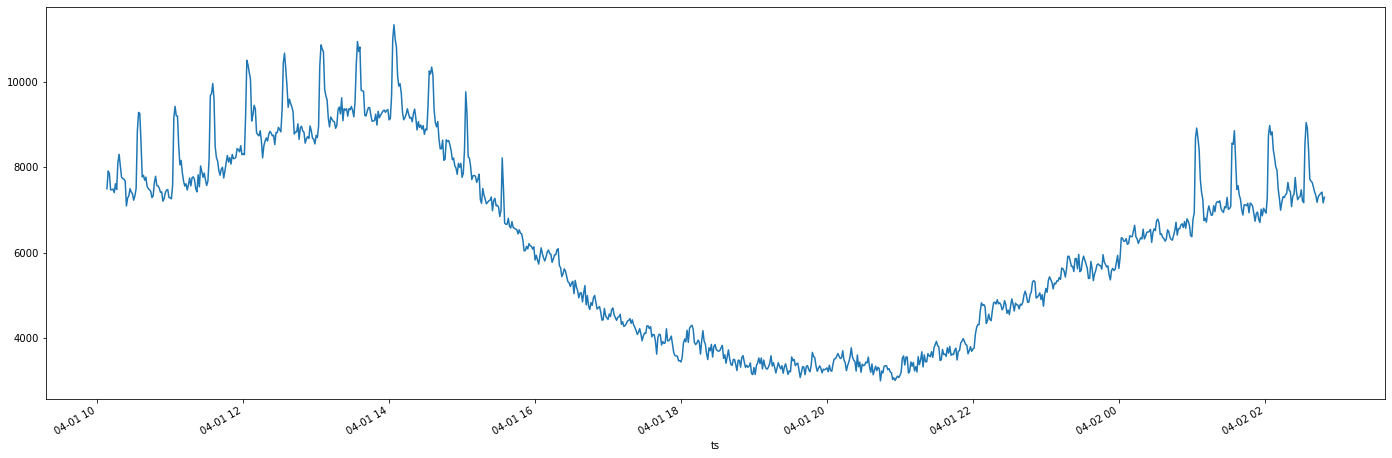

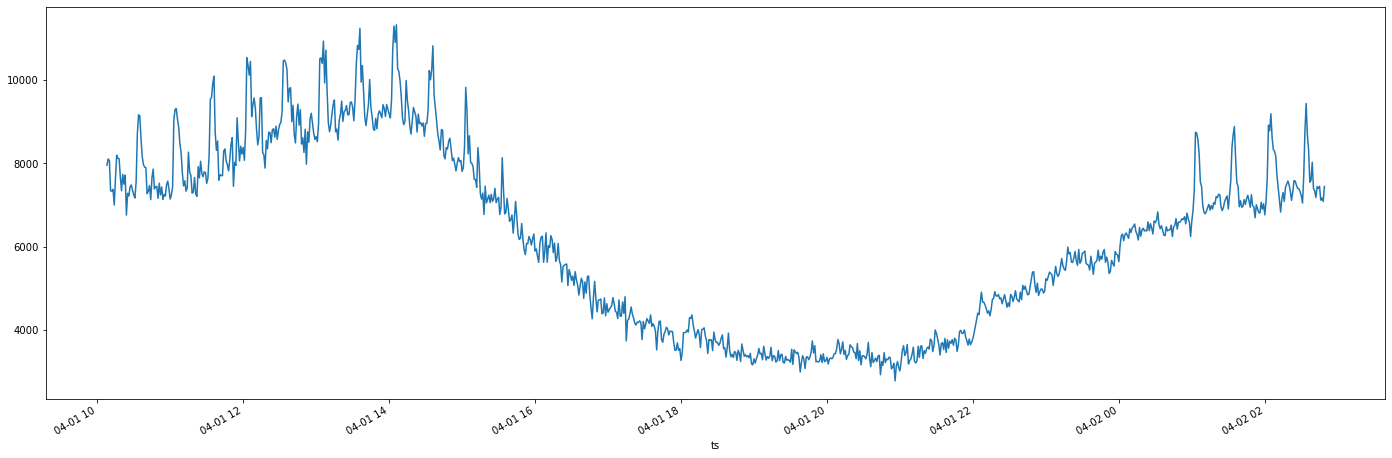

In [31]:
plt.rcParams['figure.figsize'] = (24,8)

df["value"][:1000].plot()
plt.show()
df["1exp"][:1000].plot()
plt.show()
df["2exp_add"][:1000].plot()
plt.show()
df["3exp_add"][:1000].plot()
plt.show()


In [28]:
df.head()

,ts,value,label,1exp,2exp_add,3exp_add
ts,,,,,,
2017-04-01 10:08:00,2017-04-01 10:08:00,7934.0,0,7934.000,7494.945455,7955.570796
2017-04-01 10:09:00,2017-04-01 10:09:00,7782.0,0,7934.000,7907.395020,8107.518460
2017-04-01 10:10:00,2017-04-01 10:10:00,7349.0,0,7797.200,7849.136455,8068.746329
2017-04-01 10:11:00,2017-04-01 10:11:00,7426.0,0,7393.820,7471.008038,7344.112701
2017-04-01 10:12:00,2017-04-01 10:12:00,7447.0,0,7422.782,7469.841180,7331.636360


/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

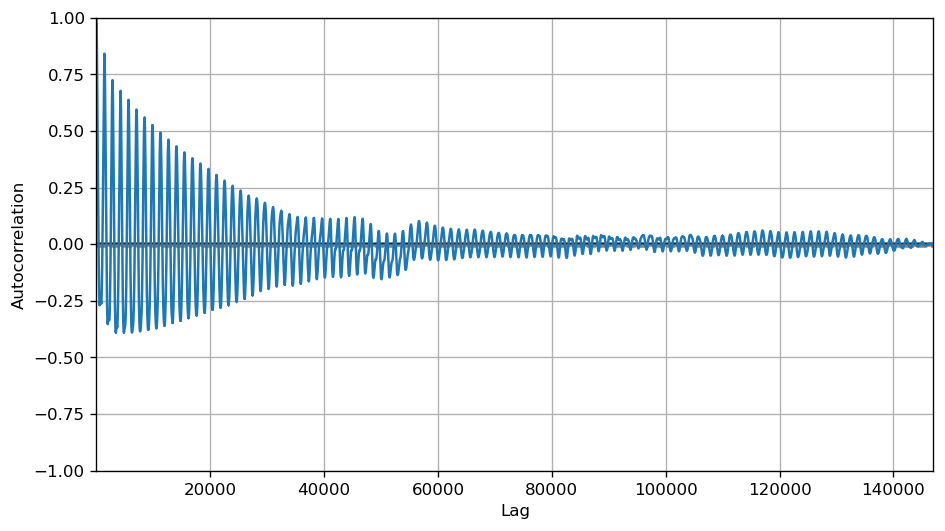

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
 
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['value'].tolist())